In [1]:
import numpy as np 
import cv2
import math
from matplotlib import pyplot as plt

def show(img1):
    cv2.imshow('img',img1)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [2]:
def hit(image, temp,a,b):
    c = 0
    h_t, w_t = temp.shape
    
    for u in range(0,w_t):
        for v in range(0,h_t):
            if temp[v,u] == 255 and temp[v,u] == image[b-h_t//2+v,a-w_t//2+u]:
                return 255
    return 0
def fit(image, temp,a,b):
#     c = 0
    h_t, w_t = temp.shape
    
    for u in range(0,w_t):
        for v in range(0,h_t):
            if temp[v,u] == 255 and temp[v,u] != image[b-h_t//2+v,a-w_t//2+u]:
                return 0
    return 255
def dilation(i,t):
    h,w  = img.shape
    h_t, w_t = t.shape
    empty = np.zeros((h,w))
    for i in range(w_t//2,w-w_t//2):
        for j in range(h_t//2,h-h_t//2):
            c = hit(img,t,i,j)
            empty[j,i] = c
    return empty
def erosion(i,t):
    h,w  = img.shape
    h_t, w_t = t.shape
    empty = np.zeros((h,w))
    for i in range(1,w-w_t//2):
        for j in range(1,h-h_t//2):
            c = fit(img,t,i,j)
            empty[j,i] = c
    return empty

In [3]:
ele = np.array(([0,1,0],[1,1,1],[0,1,0]))
ele*=255

In [11]:
img = cv2.imread('data/body1.bmp',0)

In [12]:
def opening(imgx,temp):
    return dilation(erosion(imgx,temp),temp)
def closing(imgx,temp):
    return erosion(dilation(imgx,temp),temp)

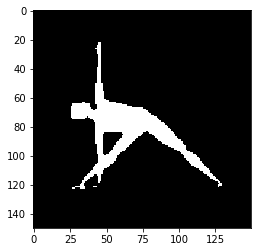

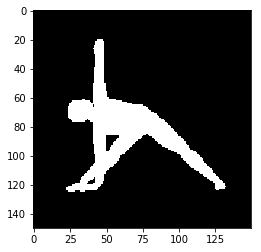

In [14]:
plt.imshow(erosion(img,ele), cmap='gray')
plt.show()
plt.imshow(dilation(img,ele), cmap='gray')
plt.show()

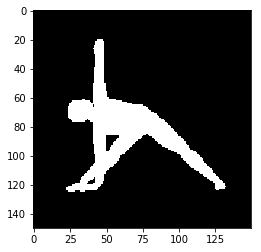

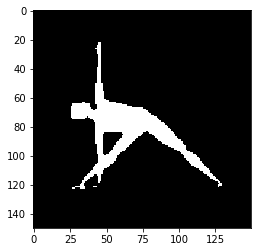

In [16]:
plt.imshow(opening(img,ele), cmap='gray')
plt.show()
plt.imshow(closing(img,ele), cmap='gray')
plt.show()